<a href="https://colab.research.google.com/github/jiw0n-lee/ESAA/blob/main/YB_week3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

In [ ]:
import os
import subprocess

dir_path = "../input"

if not os.path.exists(dir_path):
    print(f"폴더 {dir_path}가 존재하지 않습니다. 생성합니다.")
    os.makedirs(dir_path)

try:
    result = subprocess.run(["ls", dir_path], check=True, capture_output=True, text=True)
    print("디렉터리 내용:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print(f"오류 발생: {e}")
    print(f"출력: {e.output}")

폴더 ../input가 존재하지 않습니다. 생성합니다.
디렉터리 내용:



In [ ]:
from subprocess import check_output
print(check_output(["ls",'../input']).decode("utf8"))

In [ ]:
order_products_train_df = pd.read_csv("/content/drive/MyDrive/ESAA/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/drive/MyDrive/ESAA/order_products__prior.csv")
orders_df = pd.read_csv("/content/drive/MyDrive/ESAA/orders.csv")
products_df = pd.read_csv("/content/drive/MyDrive/ESAA/products.csv")
aisles_df = pd.read_csv("/content/drive/MyDrive/ESAA/aisles.csv")
departments_df = pd.read_csv("/content/drive/MyDrive/ESAA/departments.csv")

In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


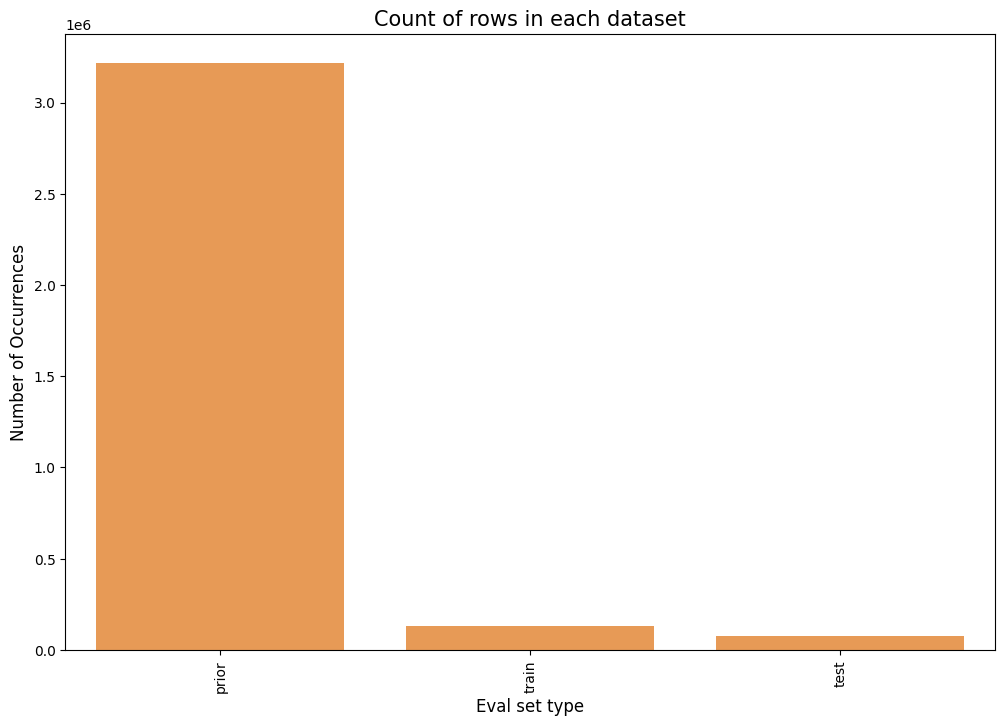

In [ ]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")['user_id'].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


<ipython-input-11-123e9950a252>:1: FutureWarning: The provided callable <function max at 0x7f72175c89a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()


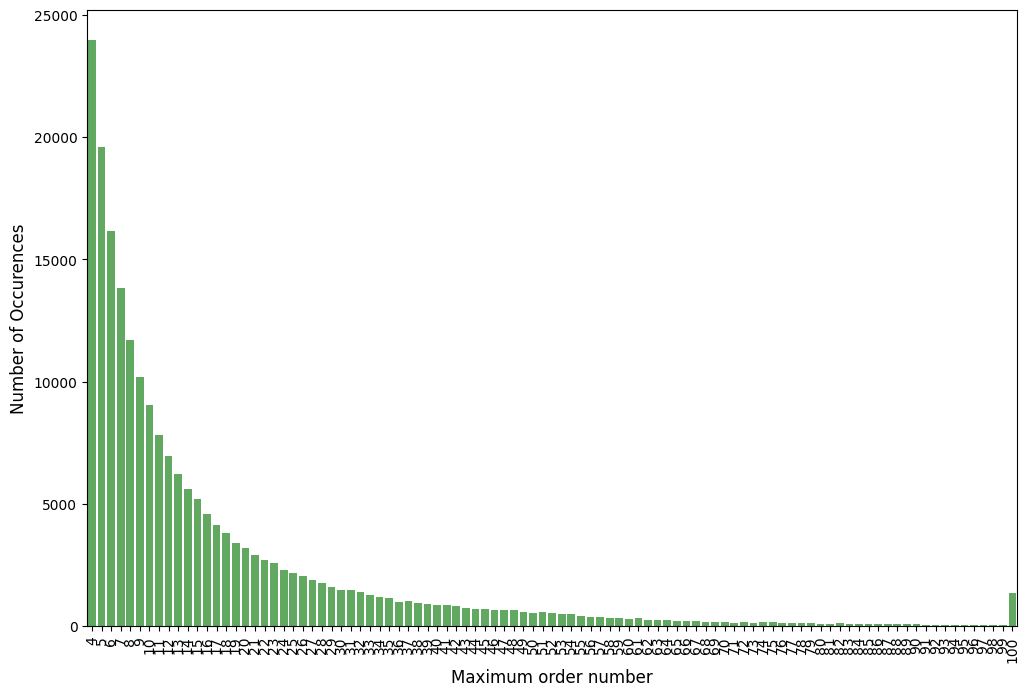

In [ ]:
cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

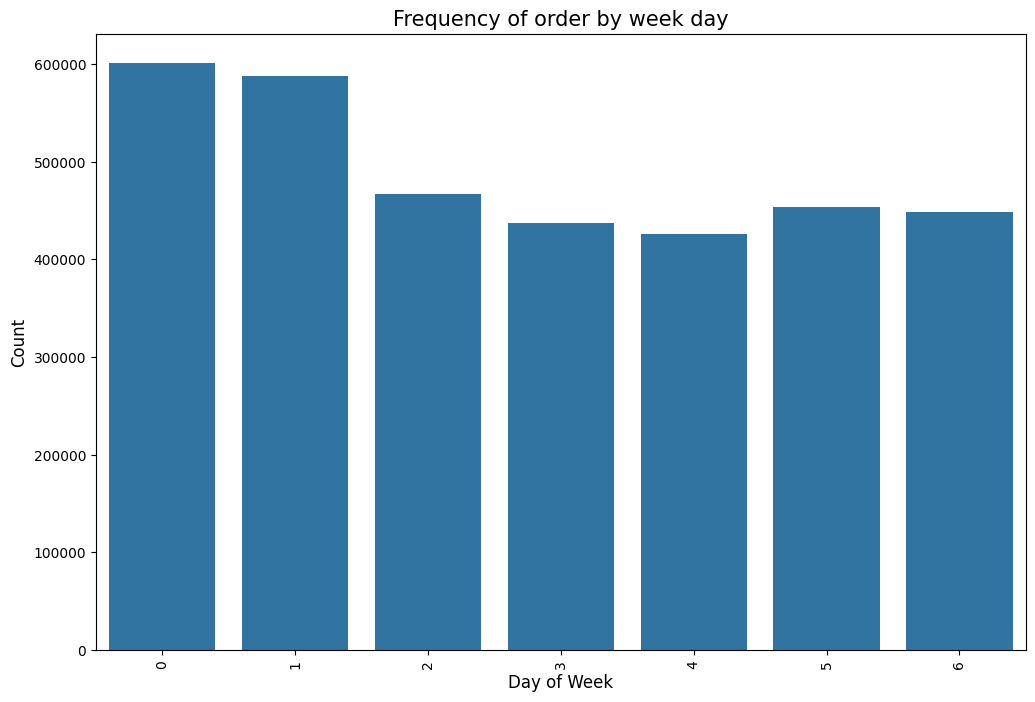

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='order_dow', data = orders_df, color = color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize = 15)
plt.show()